In [1]:
pip install tweepy

In [2]:
import tweepy 
import pandas as pd
import csv
from google.colab import drive

In [3]:
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [6]:
#Tus credenciales consumer_key, consumer_secret, token_key, token_secret
consumer_key = 'NHM7F8y0d4ERLsh1FdXKyez3f'
consumer_secret = 'vd2UsO4mJ7H7oMbufEKhVLQZdj9aB4eOkkwjVG3CoRkOhvxhRU'
access_token_key = '69721550-yNbG4UDRpt3H5XJJA4qKWtQxP6WQUwOdIDf2T4MMS'
access_token_secret = '5t2MdIkdz9OnZVDKX4rnL4i2eS9Uz1pZwV8vxRnMHxYL4'

In [7]:
def api_connection():
  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token_key, access_token_secret)
  api = tweepy.API(auth, wait_on_rate_limit=True)

  try:
    api.verify_credentials()
    print('Auth Ok!')
  except Exception:
    print('Error!')
  
  return api

api = api_connection()

Auth Ok!


In [9]:
def extract_tweets(hashtag, count):
  api = api_connection()
  tweets = []
  for tweet in tweepy.Cursor(api.search, q=hashtag, lang='en', include_rts=False).items(count):
    if (not tweet.retweeted and 'RT @' not in tweet.text):
      tweets.append(tweet.text)
      #avatar, localización, verificada, hashtag, user_name, user_id, tweets.entities (url, imagenes, etc), source (android, web, ios)
      #source (android, web, ios) = @mercadito. ios = positivo,negativo,neutro. android=p,n,n.
  return tweets

In [10]:
print('Extracting Tweets...')
tweets = extract_tweets('#SpaceX', 200)
df = pd.DataFrame(data=tweets, columns=['text'])
path = f'drive/My Drive/tweet_ext/tweets_spacex.csv'
df.to_csv(path, sep=',', index=False)

Extracting Tweets...
Auth Ok!


In [11]:
path = f'drive/My Drive/tweet_ext/tweets_spacex.csv'
df = pd.read_csv(path)

In [12]:
df.head()

,text
0,SpaceX and ULA win billions in Pentagon rocket...
1,"Starlink-9: These are really, really cool so g..."
2,"Meet the Mars Generation\n\nBelieve it or not,..."
3,"""..The ULA is receiving 60% of the specified c..."
4,He’s the biggest piece of shit ever born. \nHe...


In [13]:
import nltk as nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
def transform(text):
  stopWords = set(stopwords.words('english'))
  text = str(text)
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # Remover menciones @platzi 
  text = re.sub(r'RT[\s]', ' ', text) # Remover RTs
  text = re.sub(r'#', ' ', text) # Remover # en el tweet
  text = re.sub(r'https?:\/\/\S+', ' ', text) #Remover links

  words = text.lower().split()

  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  stripped = [re_punc.sub('', w) for w in words]
  no_garbage = [w for w in stripped if not w in stopWords]

  return (" ".join(no_garbage))

In [15]:
df['tweets_transform'] = df['text'].apply(transform)

In [16]:
df['tweets_transform'].head()

0    spacex ula win billions pentagon rocket contra...
1    starlink9 really really cool go watch give fol...
2    meet mars generation believe ready settle mars...
3    ula receiving 60 specified contracts spacex ta...
4    he’s biggest piece shit ever born he’s gotta g...
Name: tweets_transform, dtype: object

In [17]:
from textblob import TextBlob
def set_Sentiment(text):
  text = str(text)
  if text != '':
    analysis = TextBlob(text)
    if analysis.detect_language() == 'es':
      analysis = analysis.translate(from_lang='es', to='en').sentiment
      sentiment = analysis.polarity
      return sentiment

In [18]:
df['polarity'] = df['tweets_transform'].apply(set_Sentiment)

In [19]:
df['polarity'].head() #-1 más negatividad, 1 más positiva 

0    None
1    None
2    None
3    None
4    None
Name: polarity, dtype: object

In [20]:
df['text'][1]

'Starlink-9: These are really, really cool so go watch and give them a follow!\n#SpaceX #ElonMusk #Starlink https://t.co/Ah3PqsdwnR'

In [21]:
#WordCloud

from wordcloud import WordCloud

text = df.tweets_transform
text.head()

0    spacex ula win billions pentagon rocket contra...
1    starlink9 really really cool go watch give fol...
2    meet mars generation believe ready settle mars...
3    ula receiving 60 specified contracts spacex ta...
4    he’s biggest piece shit ever born he’s gotta g...
Name: tweets_transform, dtype: object

In [22]:
text = ' '.join(df.tweets_transform)
text

'spacex ula win billions pentagon rocket contracts  spacex comments starlink9 really really cool go watch give follow spacex elonmusk starlink meet mars generation believe ready settle mars mars space spacex… ula receiving 60 specified contracts spacex takes remaining 40 spacex ula aerospace he’s biggest piece shit ever born he’s gotta go someone put next spacex one way ticket… back space  thx featuring videos historic spacex crewdragon endeavour arrival on… difference day makes gonavigator one day youre center attention space world hauling h… tough one may force martian mars spacex bb8 lightsaber… daily spacex pic day 59 dragon released station spacex elonmusk 📸 arca space good spacex spacex boca chica launch site seen 2100 ft msl🛩🚀📷 0807 spacex bocachica … ifyou havent seen check take spacex sn5 youtube using simplerockets2 mission simulators help prove robotic operations safe reliable efficient launchvehicles… little high  bocachicatomars spacex icanimagine llc little bit work new v

In [28]:
wordcloud = WordCloud(width=1024, height=800, background_color='black', min_font_size= 14).generate(text)

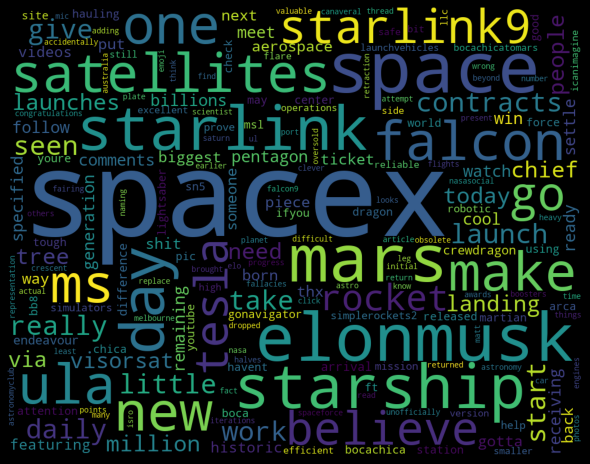

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor='black')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()